# Animal_Classifier

## Cat Vs Dog Image Classification 

### @Author :Saurabh ... Date :10-Jan

### Importing all required lib

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pathlib import Path
from imutils import paths
import cv2

In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,Dropout,Input ,Lambda
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
from PIL import Image
from IPython.display import Image

- ### Checking wheather physical_devices for tranings images

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
pwd

'E:\\DataScience\\Data_Center\\Animal_Classifier'

In [6]:
path = 'E:\\DataScience\\Data_Center\\Animal_Classifier'
os.listdir(path)

['.ipynb_checkpoints', 'Animal_Classifier.ipynb', 'dataset']

In [7]:
dataset =path+"\\dataset"
os.listdir(dataset)

['test_set', 'training_set']

In [8]:
train_path =dataset+"\\training_set"
test_path =dataset+"\\test_set"

In [9]:
os.listdir(train_path)

['cats', 'dogs']

In [10]:
args ={}
args['dataset'] =dataset
args['train_path'] =train_path
args['test_path'] =test_path

In [11]:
args

{'dataset': 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset',
 'train_path': 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\training_set',
 'test_path': 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\test_set'}

In [12]:
def count_images(list):
    lst = list
    count_cat = 0
    count_dogs = 0
    for img in lst:
        if img == 'cats':
            count_cat = count_cat+1
        else :
            count_dogs = count_dogs+1
    print("Count Cat_images:",count_cat)
    print("Count Dogs_images:",count_dogs)

In [13]:
def data_lables(list):
    ipaths =list
    data  =[]
    labels=[]
    for iPath in ipaths:
        label=iPath.split(os.path.sep)[-2]
        image=cv2.imread(iPath)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(224,224))
        data.append(image)
        labels.append(label)
    
    ##data=np.array(data)/255.0
    labels=np.array(labels)
    return labels

In [14]:
print("Tranings images Counts :")
lst1=list(paths.list_images(args['train_path']))
lst2=list(data_lables(lst1))
count_images(lst2)

Tranings images Counts :
Count Cat_images: 4000
Count Dogs_images: 4000


In [15]:
print("Testing/Validation images Counts :")
lst1=list(paths.list_images(args['test_path']))
lst2=list(data_lables(lst1))
count_images(lst2)

Testing/Validation images Counts :
Count Cat_images: 1000
Count Dogs_images: 1000


In [16]:
print("Total images of Cat = Train images + Validation images :",4000+1000)
print("Total images of Dogs = Train images + Validation images :",4000+1000)

Total images of Cat = Train images + Validation images : 5000
Total images of Dogs = Train images + Validation images : 5000


In [17]:
train_path

'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\training_set'

In [18]:
os.listdir(train_path)

['cats', 'dogs']

## Cats

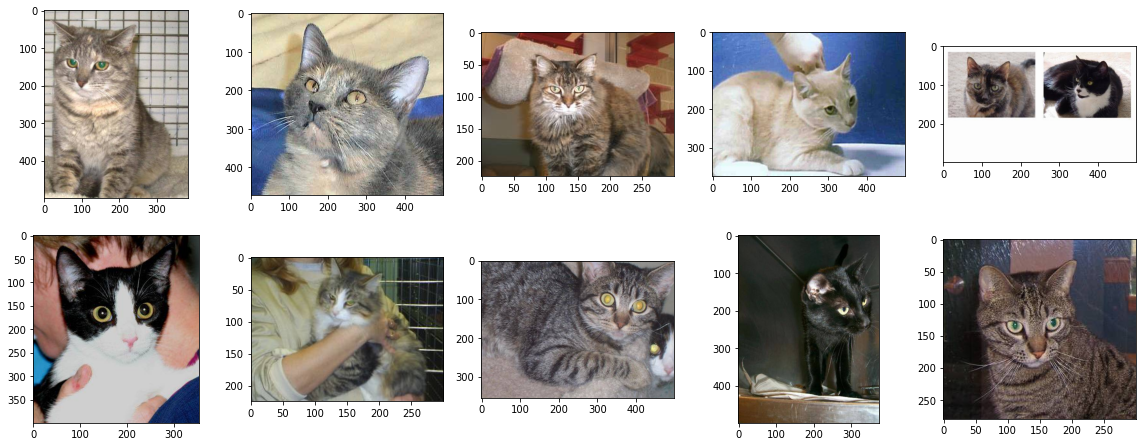

In [24]:
cats =[]
images_path =train_path+"\\cats"
for filenames in os.listdir(images_path):
    cats.append(os.path.join(images_path,filenames))
    
fig = plt.figure(figsize=(20,20))
for i in range(10):
    idx =np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(cats[idx])
    plt.imshow(image)

## Dogs

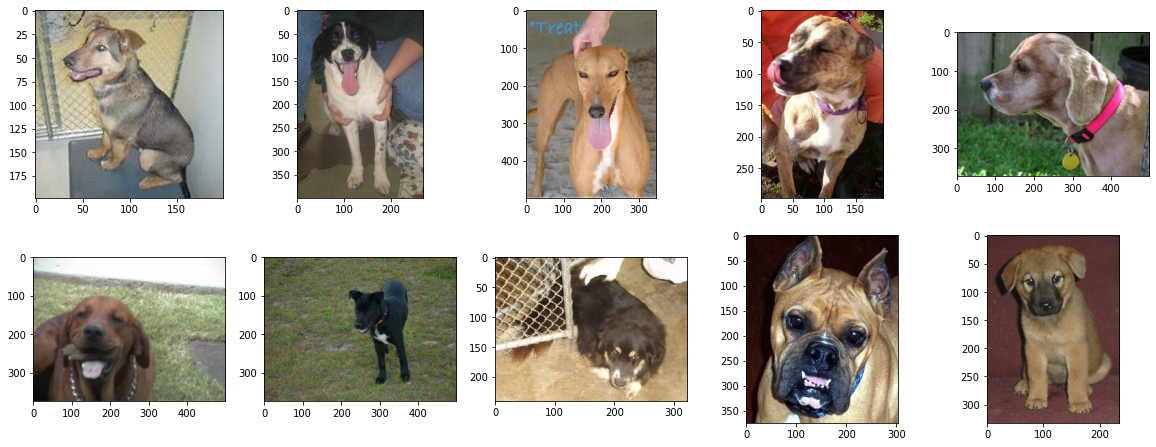

In [25]:
dogs =[]
images_path =train_path+"\\dogs"
for filenames in os.listdir(images_path):
    dogs.append(os.path.join(images_path,filenames))
    
fig = plt.figure(figsize=(20,20))
for i in range(10):
    idx =np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(dogs[idx])
    plt.imshow(image)

## Cat Vs Dog

Text(0.5, 1.0, 'Dog')

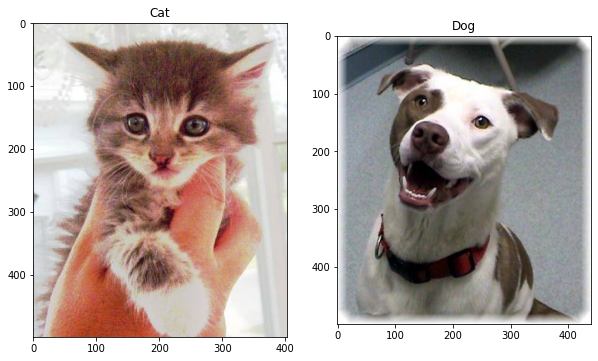

In [27]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
image1 =plt.imread(cats[3])
plt.imshow(image1)
plt.title("Cat")
plt.subplot(1,2,2)
image2 =plt.imread(dogs[14])
plt.imshow(image2)
plt.title("Dog")

Text(0.5, 1.0, 'Dog')

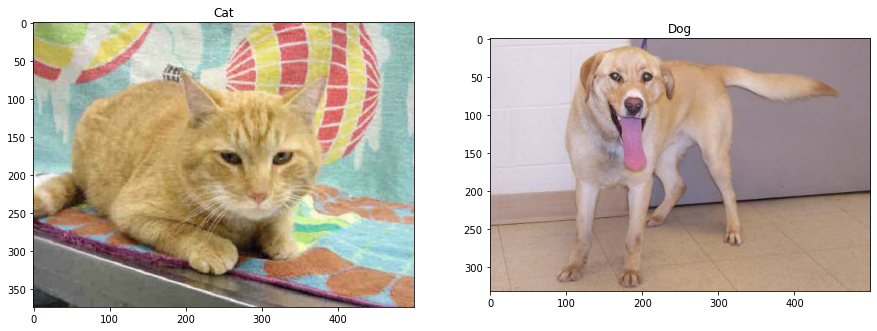

In [28]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
image1 =plt.imread(cats[24])
plt.imshow(image1)
plt.title("Cat")
plt.subplot(1,2,2)
image2 =plt.imread(dogs[12])
plt.imshow(image2)
plt.title("Dog")

Text(0.5, 1.0, 'Dog')

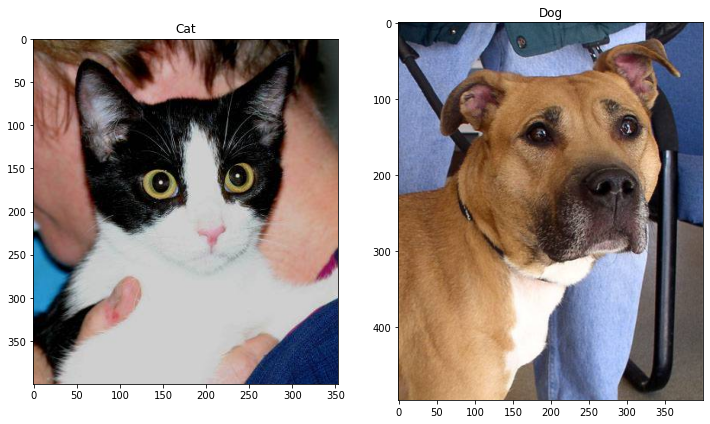

In [23]:
fig = plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
image1 =plt.imread(cats[13])
plt.imshow(image1)
plt.title("Cat")
plt.subplot(1,2,2)
image2 =plt.imread(dogs[77])
plt.imshow(image2)
plt.title("Dog")

In [29]:
for dirname,_ ,filesnames in os.walk(dataset):
    for filename in filesnames:
        print(os.path.join(dirname,filename))

E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4001.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4002.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4003.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4004.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4005.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4006.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4007.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4008.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4009.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4010.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4011.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\test_set\cats\cat.4012.jpg
E:\DataScience\Data_Center\Animal_Classi

E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.167.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1670.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1671.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1672.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1673.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1674.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1675.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1676.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1677.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1678.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.1679.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.16

E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.938.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.939.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.94.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.940.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.941.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.942.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.943.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.944.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.945.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.946.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.947.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\cats\cat.948.jpg
E:\Da

E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3468.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3469.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.347.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3470.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3471.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3472.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3473.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3474.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3475.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3476.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.3477.jpg
E:\DataScience\Data_Center\Animal_Classifier\dataset\training_set\dogs\dog.34

## Trainings images using VGG19

In [30]:
Image_Size=[224,224]
batch_size=32

In [31]:
#importing the VGG19 and also removing top_layers and we will use pre-trained weight(imagnet weight)
mobilenet =VGG19(include_top=False,input_shape=Image_Size +[3],weights='imagenet')

In [32]:
#need_not to train the weight a we are using pre trained weight
for layer in mobilenet.layers:
    layer.trainable = False

In [33]:
##
folder= glob(train_path+"\\*")
folder

['E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\training_set\\cats',
 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\training_set\\dogs']

In [34]:
#adding output layer
X =Flatten()(mobilenet.output)
out_layers =Dense(len(folder),activation='softmax')(X)

In [35]:
#Model summary
model =Model(inputs=mobilenet.input,outputs=out_layers)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
#model_compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
#Image agumentation
#image agumentation for training set
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=10,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

#image agumentation for validation set
val_gen =ImageDataGenerator(rescale=1./255,
                            rotation_range=10,
                            width_shift_range=.1,
                            height_shift_range=.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode="nearest")

In [38]:
##
train_data =train_gen.flow_from_directory(train_path,target_size=(224,224),
                                             batch_size=32,
                                             classes=['cats','dogs'],
                                             class_mode='categorical')


valid_data =val_gen.flow_from_directory(test_path,target_size=(224,224),
                                        batch_size=32,
                                        classes=['cats','dogs'],
                                        class_mode='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
#traning images 
with tf.device('/GPU:0'):
    history =model.fit_generator(train_data,
                                 validation_data=valid_data,
                                 epochs=30,
                                 steps_per_epoch=len(train_data),
                                 validation_steps=len(valid_data)
)

Epoch 1/30
250/250 [==============================] - 167s 589ms/step - loss: 0.3643 - accuracy: 0.8411 - val_loss: 0.2731 - val_accuracy: 0.8805
Epoch 2/30
250/250 [==============================] - 143s 572ms/step - loss: 0.2842 - accuracy: 0.8821 - val_loss: 0.3148 - val_accuracy: 0.8740
Epoch 3/30
250/250 [==============================] - 142s 568ms/step - loss: 0.2389 - accuracy: 0.9035 - val_loss: 0.2576 - val_accuracy: 0.8985
Epoch 4/30
250/250 [==============================] - 144s 574ms/step - loss: 0.2706 - accuracy: 0.8932 - val_loss: 0.3171 - val_accuracy: 0.8905
Epoch 5/30
250/250 [==============================] - 152s 606ms/step - loss: 0.2126 - accuracy: 0.9162 - val_loss: 0.2812 - val_accuracy: 0.8945
Epoch 6/30
250/250 [==============================] - 151s 604ms/step - loss: 0.2467 - accuracy: 0.9044 - val_loss: 0.2524 - val_accuracy: 0.9095
Epoch 7/30
250/250 [==============================] - 156s 624ms/step - loss: 0.1949 - accuracy: 0.9218 - val_loss: 0.3087 -

In [40]:
#save the model.... 
model.save("Model.h5")

In [41]:
pwd

'E:\\DataScience\\Data_Center\\Animal_Classifier'

In [42]:
path='E:\\DataScience\\Data_Center\\Animal_Classifier'
os.listdir(path)

['.ipynb_checkpoints', 'Animal_Classifier.ipynb', 'dataset', 'Model.h5']

In [43]:
os.listdir(dataset)

['Test_data', 'test_set', 'training_set']

### Test_Image for model testing

In [44]:
Test_images_path=dataset+"\\Test_data"

In [45]:
os.listdir(Test_images_path)

['cat_test01.jpg',
 'cat_test02.jpg',
 'dog_test01.jpg',
 'dog_test02.jpg',
 'dog_test03.jpg']

In [57]:
lst =[]
for dirname,_ ,filesnames in os.walk(Test_images_path):
    for filename in filesnames:
        lst.append(os.path.join(dirname,filename))

In [58]:
lst

['E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\cat_test01.jpg',
 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\cat_test02.jpg',
 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test01.jpg',
 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test02.jpg',
 'E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test03.jpg']

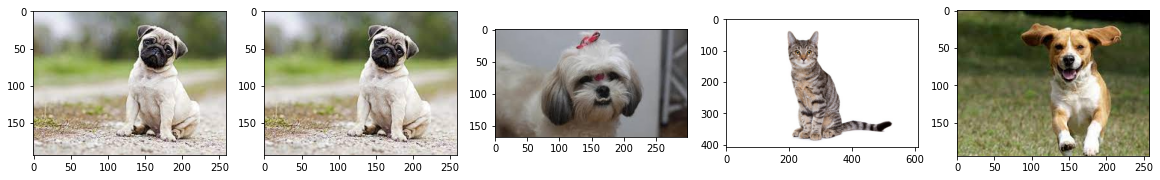

In [60]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    idx =np.random.randint(0,5)
    plt.subplot(5,5,i+1)
    image =plt.imread(lst[idx])
    plt.imshow(image)

##### Test:01 
- Cat

In [61]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\cat_test01.jpg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model.predict(img)

if result[0][0] == 1:
    print("Cat")
elif result[0][1] == 1:
    print("Dog")


Cat


Text(0.5, 1.0, 'Actual : Cat \nPredicted  : Cat')

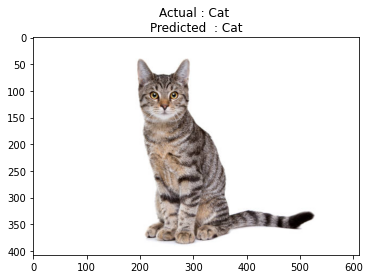

In [62]:
Image='E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\cat_test01.jpg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Cat \n" +"Predicted  : Cat")

In [93]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

def test_image(path):
    img =image.load_img(path,target_size=(224,224))
    #X=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    #img_data=preprocess_input(X)
    result=model.predict(img)
    if result[0][0] == 1:
        return("Cat")
    elif result[0][1] == 1:
        return("Dog")


Text(0.5, 1.0, 'Actual : Cat \nPredicted  :Cat')

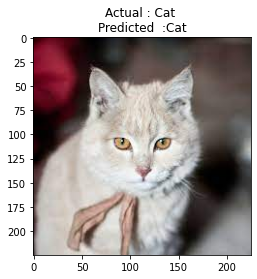

In [96]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path='E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\cat_test02.jpg'
output = test_image(path)
image=plt.imread(path)
plt.imshow(image)
plt.title("Actual : Cat \n" +"Predicted  :"+output)

Text(0.5, 1.0, 'Actual : Dog \nPredicted  : Dog')

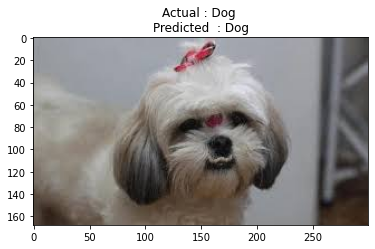

In [94]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path='E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test03.jpg'
output = test_image(path)
image=plt.imread(path)
plt.imshow(image)
plt.title("Actual : Dog \n" +"Predicted  : "+ output )

Text(0.5, 1.0, 'Actual : Dog \nPredicted  : Dog')

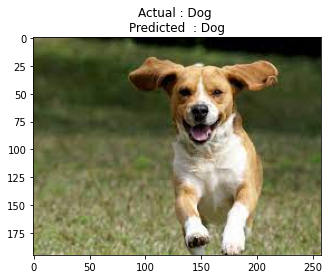

In [97]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path='E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test02.jpg'
output = test_image(path)
image=plt.imread(path)
plt.imshow(image)
plt.title("Actual : Dog \n" +"Predicted  : "+ output )

Text(0.5, 1.0, 'Actual : Dog \nPredicted  : Dog')

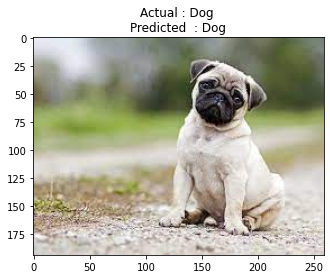

In [98]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path='E:\\DataScience\\Data_Center\\Animal_Classifier\\dataset\\Test_data\\dog_test01.jpg'
output = test_image(path)
image=plt.imread(path)
plt.imshow(image)
plt.title("Actual : Dog \n" +"Predicted  : "+ output )

 # !!! All Test image are Correctly Predicted .....
 